In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import cv2
import os 
import glob
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


In [4]:
uninfected_images = []
uninfected_labels = []
infected_images = []
infected_labels = []
def PrepData():

    for file in glob.glob("cell_images/Uninfected/*.png"):
        file = cv2.imread(file)
        file = cv2.resize(file, (81,81))
        uninfected_images.append(file)
        uninfected_labels.append(0)
    print(len(uninfected_images))
    

    for file in glob.glob("cell_images/Parasitized/*.png"):
        file = cv2.imread(file)
        file = cv2.resize(file, (81,81))
        infected_images.append(file)
        infected_labels.append(1)
    print(len(infected_images))
    
    images = uninfected_images + infected_images
    labels = uninfected_labels + infected_labels
    
    image_train, image_test, label_train, label_test = train_test_split(images, labels, test_size = 0.33)
    
    image_train = np.array(image_train)
    image_test = np.array(image_test)
    label_train = np.array(label_train)
    label_test = np.array(label_test)
    
    return image_train, image_test, label_train, label_test

In [5]:
image_train, image_test, label_train, label_test = PrepData()

13779
13779


(<matplotlib.axes._subplots.AxesSubplot at 0x1f3a8a08700>,
 <matplotlib.image.AxesImage at 0x1f3a8e093a0>)

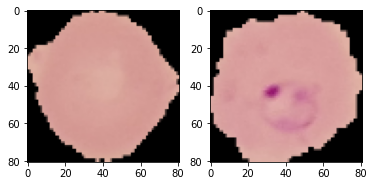

In [6]:
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(uninfected_images[0], cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(infected_images[0], cv2.COLOR_BGR2RGB))

In [7]:
from keras.layers import Convolution2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from keras.layers import MaxPooling2D

from keras.models import Sequential
from keras import optimizers

In [8]:
classifier = Sequential()
classifier.add(Convolution2D(50, (3, 3), input_shape = (81, 81, 3), activation = 'relu',padding='same'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(activation = 'relu', units=512))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'relu', units=256))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'sigmoid', units=1))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 81, 81, 50)        1400      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 50)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 40, 40, 50)        200       
_________________________________________________________________
dropout (Dropout)            (None, 40, 40, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 38, 38, 32)        14432     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 19, 19, 32)        1

In [158]:
from keras import layers

# Initialising the CNN
model = Sequential()
# Create convolutional layer. There are 3 dimensions for input shape
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(81 ,81, 3)))
# Pooling layer
model.add(layers.MaxPooling2D((2, 2)))
# Convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (64 ,64,  3)))
# Pooling layer
model.add(layers.MaxPooling2D((2, 2)))
# Adding a second convolutional layer with 64 filters
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (64 ,64,  3)))
# Second pooling layer
model.add(layers.MaxPooling2D((2, 2)))
# Adding a third convolutional layer with 128 filters
model.add(layers.Conv2D(128, (3, 3), activation = 'relu', input_shape = (64 ,64,  3)))
# Third pooling layer
model.add(layers.MaxPooling2D((2, 2)))
# Flattening
model.add(layers.Flatten())
# Full connection
model.add(layers.Dense(units = 512, activation = 'relu'))
model.add(layers.Dense(units = 1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [159]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 79, 79, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 128)        

In [160]:
history2 = model.fit(np.array(image_train), 
                         label_train, 
                         batch_size = 64, 
                         epochs = 5,
                         validation_split = 0.1)

Epoch 1/5
260/260 [==============================] - 154s 593ms/step - loss: 1.0381 - accuracy: 0.6607 - val_loss: 0.4704 - val_accuracy: 0.7645
Epoch 2/5
260/260 [==============================] - 183s 702ms/step - loss: 0.2513 - accuracy: 0.9030 - val_loss: 0.1781 - val_accuracy: 0.9415
Epoch 3/5
260/260 [==============================] - 177s 682ms/step - loss: 0.1621 - accuracy: 0.9472 - val_loss: 0.1576 - val_accuracy: 0.9459
Epoch 4/5
260/260 [==============================] - 163s 628ms/step - loss: 0.1364 - accuracy: 0.9559 - val_loss: 0.1825 - val_accuracy: 0.9307
Epoch 5/5
260/260 [==============================] - 172s 661ms/step - loss: 0.1256 - accuracy: 0.9578 - val_loss: 0.1364 - val_accuracy: 0.9534


In [161]:
results2 = classifier.evaluate(image_test,label_test,batch_size = 128)

72/72 [==============================] - 49s 675ms/step - loss: 0.1963 - accuracy: 0.9379


In [10]:
history = classifier.fit(np.array(image_train), 
                         label_train, 
                         batch_size = 64, 
                         epochs = 10,
                         validation_split = 0.1)

Epoch 1/10
260/260 [==============================] - 327s 1s/step - loss: 0.5484 - accuracy: 0.7345 - val_loss: 0.9024 - val_accuracy: 0.7704
Epoch 2/10
260/260 [==============================] - 323s 1s/step - loss: 0.2484 - accuracy: 0.9057 - val_loss: 0.6117 - val_accuracy: 0.8387
Epoch 3/10
  3/260 [..............................] - ETA: 3:32 - loss: 0.2262 - accuracy: 0.9062

KeyboardInterrupt: 

In [33]:
print(type(history))
classifier.save("D:/udemy/update model")

<class 'tensorflow.python.keras.callbacks.History'>
INFO:tensorflow:Assets written to: D:/udemy/update model\assets


In [31]:
classifier = keras.models.load_model("D:/udemy")

In [30]:
results = classifier.evaluate(image_test,label_test,batch_size = 128)

72/72 [==============================] - 44s 614ms/step - loss: 0.1855 - accuracy: 0.9403


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [39]:
y_pred = classifier.predict(image_test)
print(y_pred)

[[7.3566735e-03]
 [3.8254261e-04]
 [7.8504777e-01]
 ...
 [4.7737658e-03]
 [9.3756914e-03]
 [9.9482274e-01]]


In [40]:
categorized_y_pred = []
for pred in y_pred:
    if pred>0.5:
        pred = 1
    else:
        pred = 0
    categorized_y_pred.append(pred)
print(categorized_y_pred)

[0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 

In [152]:
conf_matrix = confusion_matrix(label_test, categorized_y_pred)
print(conf_matrix)

[[4454  132]
 [ 433 4076]]


In [153]:
totalcm = np.char.add("(", conf_matrix.astype("str")) 
totalcm = np.char.add(totalcm, ") ")
ncm = conf_matrix.astype('float') / ncm.sum(axis=1)[:, np.newaxis]
labels = (np.asarray(["{0}\n{1:.2f}".format(totalcm,ncm) for totalcm,
                       ncm in zip(totalcm.flatten(),
                       ncm.flatten())])).reshape(2,2)

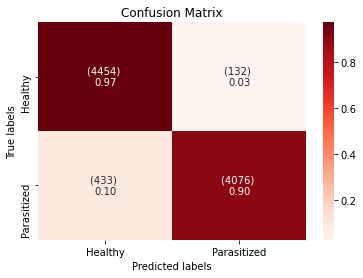

In [154]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(ncm, annot=labels, ax = ax, fmt='', cmap='Reds'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Healthy', 'Parasitized']); ax.yaxis.set_ticklabels(['Healthy', 'Parasitized']);


In [127]:
data = {'y_Actual':    label_test.tolist(),
        'y_Predicted': categorized_y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
cm = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0,1
Actual,,
0,4454,132
1,433,4076


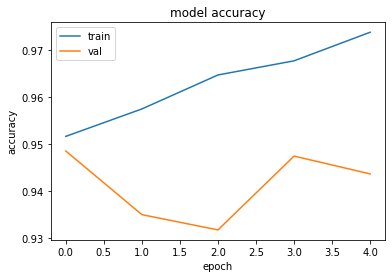

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#plotting some loss information. Loss is the penalty for a bad prediction. The lower the number, the better the prediction. 
#The model tries to find the lowest loss possible 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()